In [29]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

### Reading dataset

In [30]:
data=pd.read_csv('Zoo.csv')
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [31]:
np.unique(data['type'])

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [32]:
x=data.iloc[:,1:17]
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [33]:
y=data.iloc[:,17]
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

#### Splitting into test and train data

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score

x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42)
x_train.shape,y_train.shape, x_test.shape,y_test.shape


((70, 16), (70,), (31, 16), (31,))

## K-Nearest Neighbors model

In [35]:
n_neighbors=np.array(range(1,25))
param_grid=dict(n_neighbors=n_neighbors)

##### Using Gridsearch CV for getting better value of k

In [36]:
from sklearn.model_selection import GridSearchCV
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [37]:
print(grid.best_score_)
print(grid.best_params_)

0.9714285714285715
{'n_neighbors': 1}


##### With k=1 we got 97% accuracy but to avoid over fitting we are using another value of k 

In [38]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [39]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

1    14
6     6
4     4
2     3
7     2
3     1
5     1
dtype: int64

In [40]:
pd.crosstab(y_test,preds)

col_0,1,2,3,4,5,6,7
type,,,,,,,
1,14,0,0,1,0,0,0
2,0,3,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,2,0,0,0
5,0,0,1,0,1,0,0
6,0,0,0,0,0,5,0
7,0,0,0,0,0,1,2


In [41]:
np.mean(preds==y_test)

0.8709677419354839

#### Plotting accuracy for diff k values

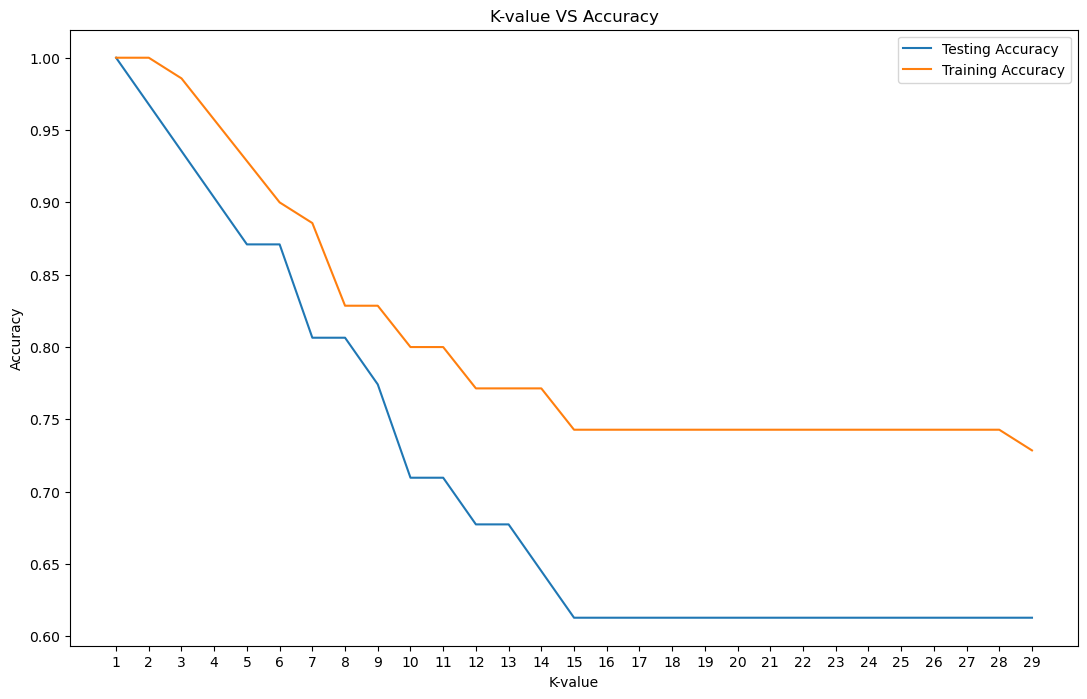

Best accuracy is 1.0 with K = 1


In [42]:
import matplotlib.pyplot as plt 
%matplotlib inline
k_values = np.arange(1,30)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('K-value VS Accuracy')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))
